# Predicting Restaurant Ratings with Machine Learning

# Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Restaurant_Dataset.csv")

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

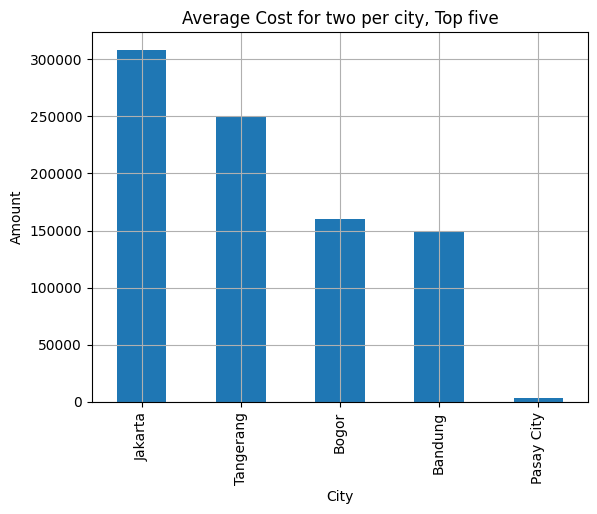

In [7]:
# Group by `city` and calculate `average cost`

df.groupby("City")["Average Cost for two"].mean().sort_values(ascending = False).head().plot(kind = "bar")
plt.title("Average Cost for two per city, Top five")
plt.xlabel("City")
plt.ylabel("Amount")
plt.grid()
plt.show()

In [8]:
# Cuisines total number of votes

data = df.groupby("Cuisines")["Votes"].sum().reset_index()

In [9]:
data[data["Votes"] != 0]

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1820,"Western, Asian, Cafe",259
1821,"Western, Fusion, Fast Food",32
1822,World Cuisine,95
1823,"World Cuisine, Mexican, Italian",115


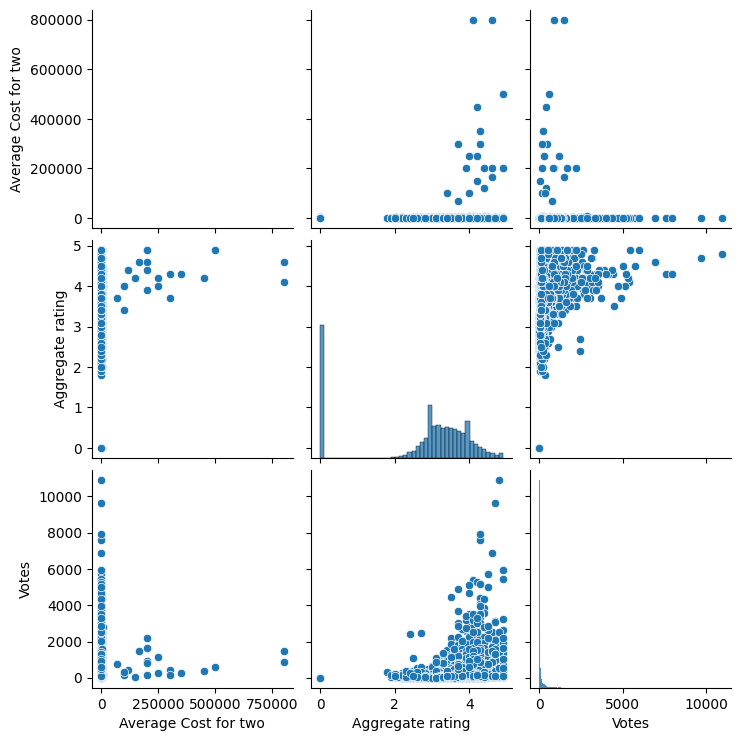

In [10]:
sns.pairplot(df[["Average Cost for two", "Aggregate rating", "Votes"]])
plt.show()

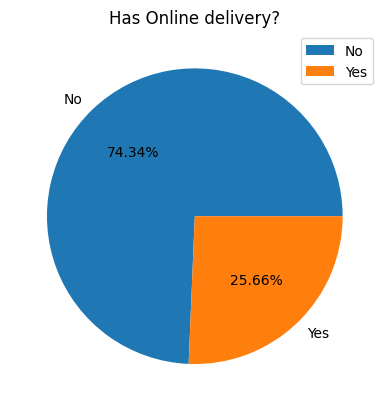

In [11]:
df["Has Online delivery"].value_counts().plot(kind = "pie", autopct = "%0.2f%%")
plt.title("Has Online delivery?")
plt.ylabel("")
plt.legend()
plt.show()

In [12]:
df[["Aggregate rating", "Rating text"]].sort_values(by = "Aggregate rating", ascending = True).head(2300)

,Aggregate rating,Rating text
6615,0.0,Not rated
1994,0.0,Not rated
1995,0.0,Not rated
1996,0.0,Not rated
1997,0.0,Not rated
...,...,...
8716,2.4,Poor
4953,2.4,Poor
1771,2.4,Poor
8467,2.4,Poor


In [13]:
df = df[df["Rating text"] != "Not rated"]

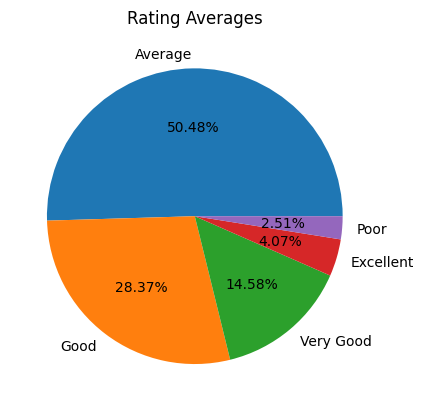

In [14]:
df["Rating text"].value_counts().plot(kind = "pie", autopct = "%0.2f%%")
plt.title("Rating Averages")
plt.ylabel("")
plt.show()

In [15]:
X = df[["Average Cost for two", "Has Table booking", "Has Online delivery", "Price range"]]

In [16]:
X.head()

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,Yes,No,3
1,1200,Yes,No,3
2,4000,Yes,No,4
3,1500,No,No,4
4,1500,Yes,No,4


In [17]:
# Above 2 below 2.5 Poor
# Above 2.5 below 3.5 Average
# Above 3.5 below 4 Good
# Above 4 below 4.5 Very Good
# Above 4.5 Excellent

In [18]:
y = df[["Aggregate rating"]]

In [19]:
y.head()

,Aggregate rating
0,4.8
1,4.5
2,4.4
3,4.9
4,4.8


In [20]:
# can be removed this code
X["Price range"].value_counts()

,count
Price range,
1,2744
2,2711
3,1373
4,575


In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [23]:
X["Has Table booking"] = label_encoder.fit_transform(X["Has Table booking"])

In [24]:
X.head()

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,No,3
1,1200,1,No,3
2,4000,1,No,4
3,1500,0,No,4
4,1500,1,No,4


In [25]:
X["Has Online delivery"] = label_encoder.fit_transform(X["Has Online delivery"])

In [26]:
X.head()

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,0,3
1,1200,1,0,3
2,4000,1,0,4
3,1500,0,0,4
4,1500,1,0,4


In [27]:
# can be removed this code
label_encoder.classes_

array(['No', 'Yes'], dtype=object)

In [28]:
# `Has Table booking` 0 is 'NO' and 1 is 'YES'
# `Has Online delivery` 0 is 'NO' and 1 is 'YES'

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
X = scaler.fit_transform(X)

In [31]:
X

array([[-0.0190367 ,  2.37978283, -0.68302371,  1.10671644],
       [-0.0135729 ,  2.37978283, -0.68302371,  1.10671644],
       [ 0.13941344,  2.37978283, -0.68302371,  2.18135204],
       ...,
       [-0.06985002, -0.42020641, -0.68302371,  2.18135204],
       [-0.07258191, -0.42020641, -0.68302371,  2.18135204],
       [-0.07613338, -0.42020641, -0.68302371,  0.03208084]])

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [35]:
# User Defined funtion for 'predictions'

def model_result(predictions):
    print("Mean absolute error on model is {}".format(mean_absolute_error(y_test, predictions)))
    print("Root mean squared error on model is {}".format(np.sqrt(mean_squared_error(y_test, predictions))))

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [37]:
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
PredictionsFromLr = lr.predict(X_test)

In [39]:
model_result(PredictionsFromLr)

Mean absolute error on model is 0.4022103064096096
Root mean squared error on model is 0.5046624225685539


In [40]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [41]:
svr_model = SVR()

In [42]:
# param_gride_svr = {"C" : [0.001, 0.01, 0.1, 0.5],
#                   "kernel" : ["linear", "rbf", "poly"],
#                   "degree" : [2, 3, 4]}

In [43]:
param_gride_svr = {"C" : [0.1, 0.5],
                  "kernel" : ["linear", "poly"],
                  "degree" : [2]}

In [44]:
grid_svr = GridSearchCV(svr_model, param_gride_svr)
grid_svr.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [2],
                         'kernel': ['linear', 'poly']})

In [45]:
preds_grid_svr = grid_svr.predict(X_test)

In [46]:
model_result(preds_grid_svr)

Mean absolute error on model is 0.3989982243472485
Root mean squared error on model is 0.5073766149170916


In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
tree_model = DecisionTreeRegressor()

In [49]:
param_grid = {"max_depth" : [10, 30],
              "min_samples_leaf" : [1, 2],
              "min_samples_split" : [2, 5]}

In [50]:
grid_tree = GridSearchCV(estimator = tree_model, param_grid = param_grid)

In [51]:
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [52]:
tree_predications = grid_tree.predict(X_test)

In [53]:
model_result(tree_predications)

Mean absolute error on model is 0.3698211328307449
Root mean squared error on model is 0.4653513222704233


In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
rfr_model = RandomForestRegressor()

In [56]:
param_grid_rfr = {"max_depth" : [5, 15],
                  "n_estimators" : [2, 3, 10]}

In [57]:
grid_rfr = GridSearchCV(estimator = rfr_model, param_grid = param_grid_rfr)

In [58]:
grid_rfr.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 3, 10]})

In [59]:
RandomForest_predications = grid_rfr.predict(X_test)

In [60]:
model_result(RandomForest_predications)

Mean absolute error on model is 0.3686453096240834
Root mean squared error on model is 0.46202214960293314


In [61]:
grid_rfr.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [62]:
grid_tree.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [63]:
from sklearn.neighbors import KNeighborsRegressor

In [64]:
knn = KNeighborsRegressor()

In [65]:
knn_param_grid = {"n_neighbors" : [3, 5, 7, 9, 11, 13, 15, 17]}

In [66]:
knn_grid_search = GridSearchCV(estimator = knn, param_grid = knn_param_grid)

In [67]:
knn_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17]})

In [68]:
knn_preds = knn_grid_search.predict(X_test)

In [69]:
model_result(knn_preds)

Mean absolute error on model is 0.37235969337093383
Root mean squared error on model is 0.47239695402599535


In [70]:
knn_grid_search.best_params_

{'n_neighbors': 17}

In [71]:
from sklearn.ensemble import AdaBoostRegressor

In [72]:
ada = AdaBoostRegressor()

In [73]:
ada_param_grid = {"n_estimators" : [50, 100, 200],
                 "learning_rate" : [0.1, 0.5, 1]}

In [74]:
ada_grid_search = GridSearchCV(estimator = ada, param_grid = ada_param_grid)

In [75]:
ada_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]})

In [76]:
ada_preds = ada_grid_search.predict(X_test)

In [77]:
model_result(ada_preds)

Mean absolute error on model is 0.38154600962626606
Root mean squared error on model is 0.47246774670195374


In [78]:
ada_grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [79]:
grid_rfr

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 3, 10]})

# Serialization

In [80]:
import joblib

In [81]:
joblib.dump(grid_rfr, "mlmodel.pkl")

['mlmodel.pkl']

In [82]:
joblib.dump(scaler, "Scaler.pkl")

['Scaler.pkl']

# Steamlit Web Application

In [83]:
!pip install streamlit -q

In [84]:
!wget -q -O - ipv4.icanhazip.com

In [85]:
!streamlit run app.py & npx localtunnel --port 8501